In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('DatosSeguros.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [7]:
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [8]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


In [10]:
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


In [11]:
print(df.columns)

Index(['edad', 'sexo', 'imc', 'hijos', 'fumador', 'region', 'valor_seguro'], dtype='object')


In [13]:
edad = df.sort_values('edad')
edad.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
1097,18,F,31.350,4,no,Boyaca,4561.18850
59,18,M,31.680,2,yes,Cundinamarca,34303.16720
1251,18,M,33.330,0,no,Cundinamarca,1135.94070
297,18,M,22.990,0,no,Boyaca,1704.56810
1255,18,F,39.820,0,no,Cundinamarca,1633.96180
944,18,F,40.185,0,no,Boyaca,2217.46915
1152,18,F,30.305,0,no,Boyaca,2203.73595
665,18,M,33.660,0,no,Cundinamarca,1136.39940
52,18,F,35.625,0,no,Boyaca,2211.13075
650,18,M,28.500,0,no,Boyaca,1712.22700


**Agrupar los datos**

In [14]:
rangos = [17, 28,38,48,58,68]

#Establecer el nombre para cada rango
nombrerango = ["A","B","C","D","E"]

#Crear nueva variable

df['Rango_edad'] = pd.cut(df['edad'],rangos, labels=nombrerango)
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro,Rango_edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B


In [15]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'hijos'}>,
        <Axes: title={'center': 'valor_seguro'}>]], dtype=object)

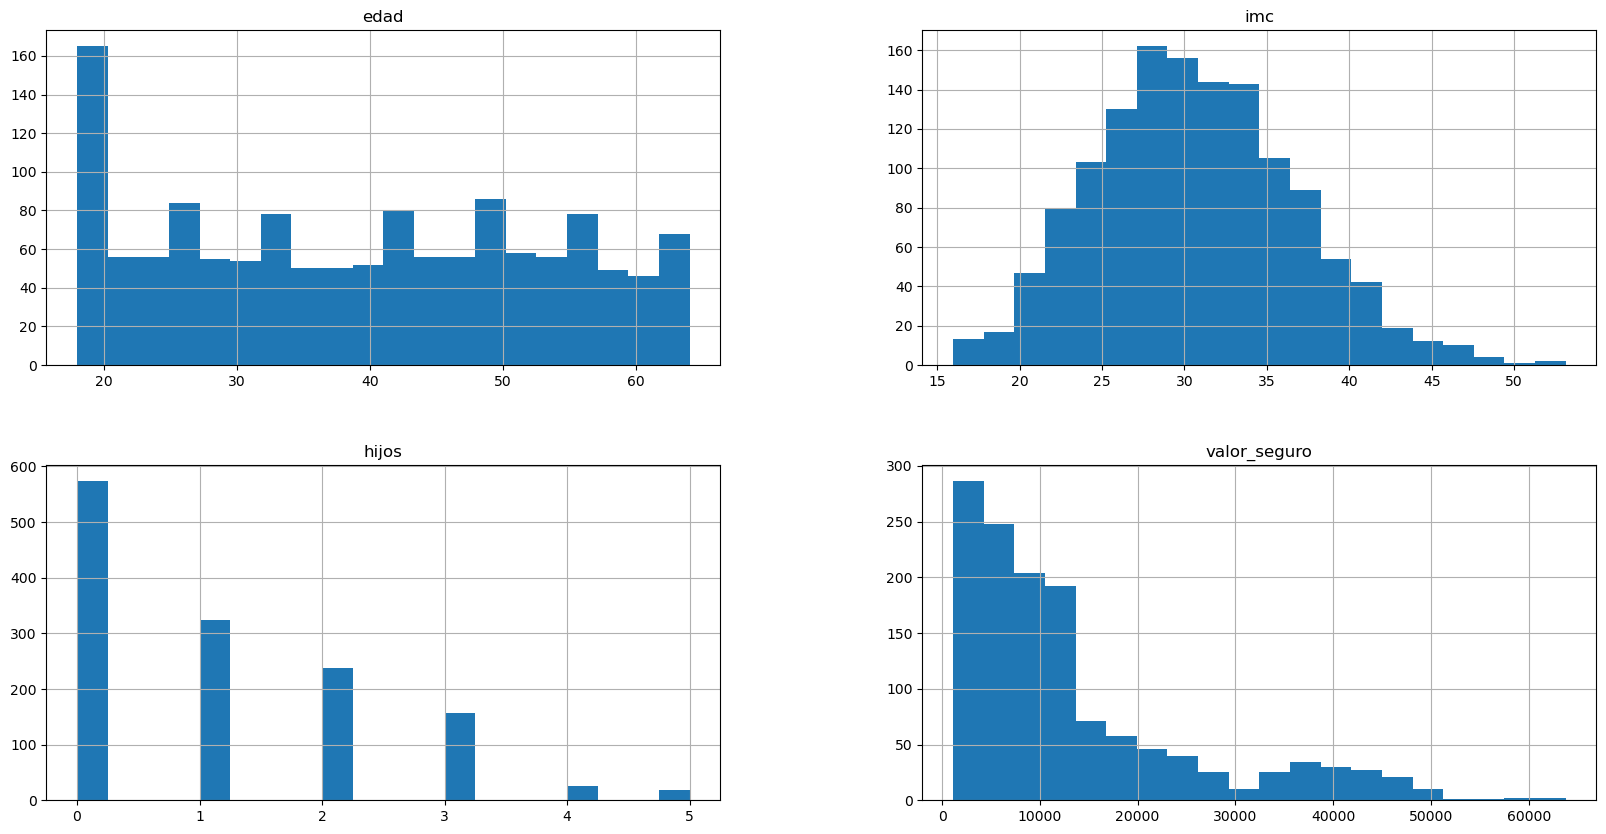

In [16]:
df.hist(bins=20, figsize=(20,10))

Fumadores y no fumadores

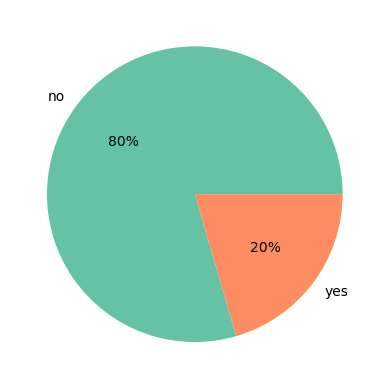

fumador
no     1060
yes     273
Name: fumador, dtype: int64


In [35]:
fumadores = df['fumador'].groupby(df['fumador']).count()
label = ['no','yes']
color = sns.color_palette('Set2')[0:5]
plt.pie(fumadores, labels = label, colors=color, autopct='%.0f%%')
plt.show()
print(fumadores)

Valores de seguro pagados por fumadores y no fumadores

<Axes: xlabel='fumador', ylabel='valor_seguro'>

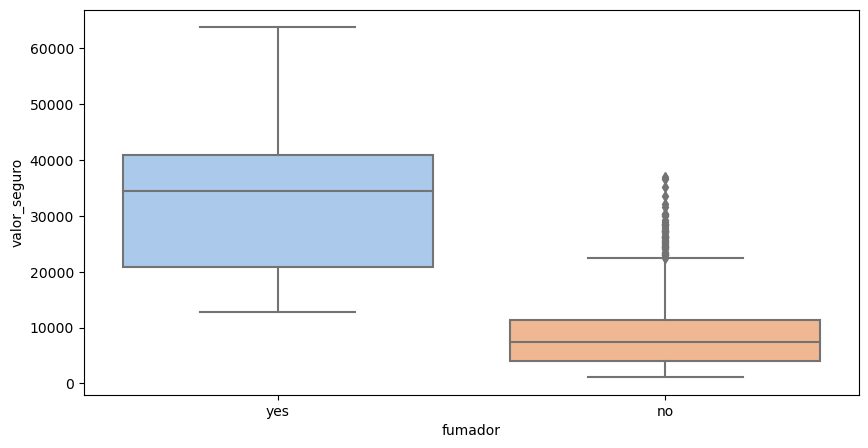

In [20]:
plt.figure(figsize=[10,5])
sns.boxplot(data = df, x ='fumador', y='valor_seguro', palette= 'pastel')

<Axes: xlabel='fumador', ylabel='count'>

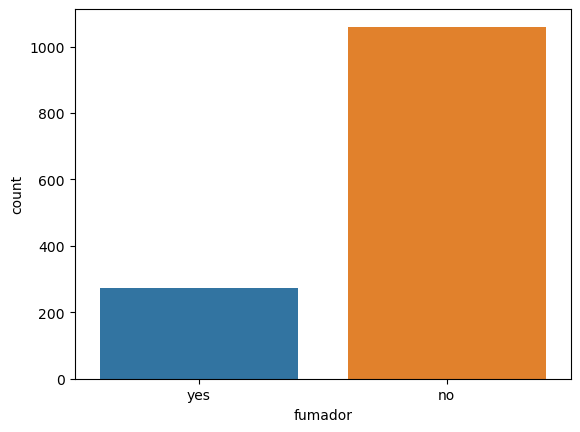

In [21]:
sns.countplot(data = df, x='fumador')

comparar valores porcentualmente pagados al seguro con rango edad

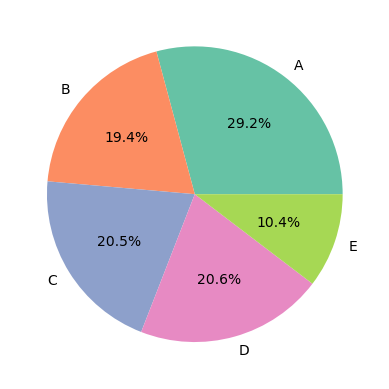

In [24]:
total_rango_edad = df['Rango_edad'].groupby(df['Rango_edad']).count()
labels = ["A","B","C","D","E"]
colors = sns.color_palette('Set2')[0:5]

plt.pie(total_rango_edad, labels = labels, colors=colors, autopct='%.1f%%')
plt.show()

Porcentual variable hijos

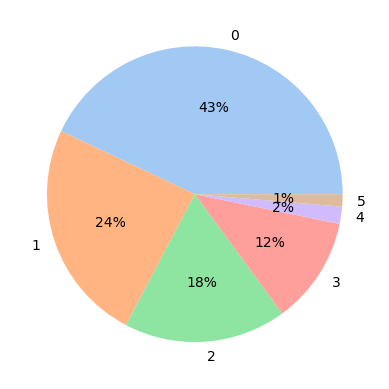

In [26]:
total_hijos= df['hijos'].groupby(df['hijos']).count()
labels = [0,1,2,3,4,5]
colors = sns.color_palette('pastel')[0:6]

plt.pie(total_hijos, labels = labels, colors=colors, autopct='%.0f%%')
plt.show()

Relación entre valor seguro y rango de edades

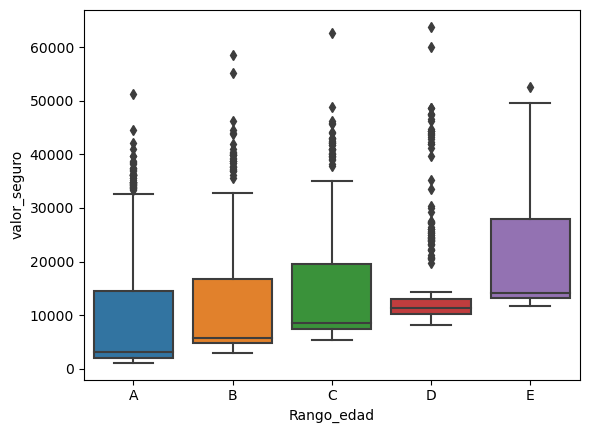

In [28]:
Read_valor = sns.boxplot(x=df['Rango_edad'], y = df['valor_seguro'])

correlaciión

C:\Users\maico\AppData\Local\Temp\ipykernel_15508\2591106797.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


<Axes: >

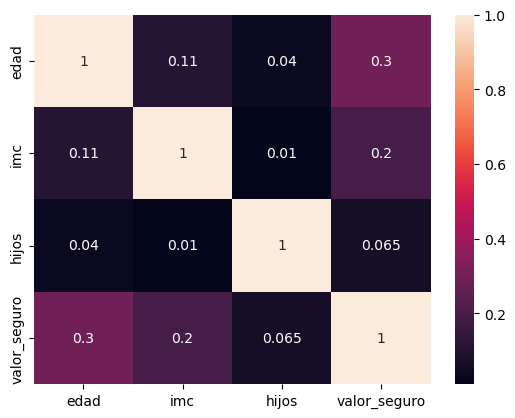

In [31]:
correlacion = df.corr()
correlacion 
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)

Relación: valor seguro, rango edad y imc

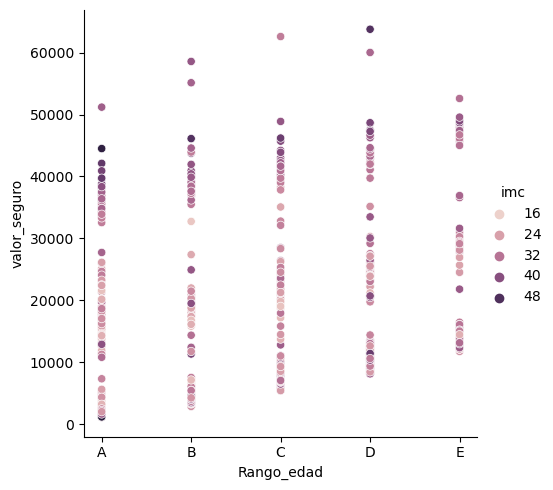

In [32]:
sns.relplot(x='Rango_edad', y = 'valor_seguro', hue= 'imc', data =df)

Valor seguro, rango de edad y fumador

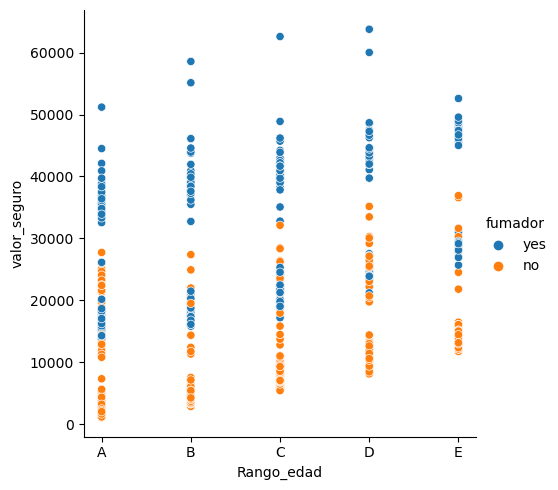

In [33]:
sns.relplot(x='Rango_edad', y = 'valor_seguro', hue= 'fumador', data =df)

Relación valor pagado, estado fumador y laregión

<Axes: xlabel='region', ylabel='valor_seguro'>

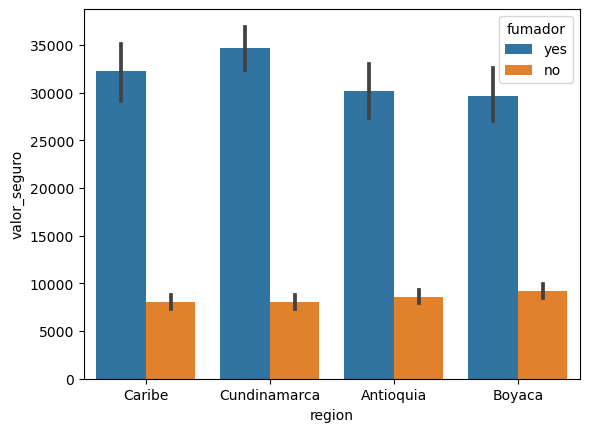

In [34]:
sns.barplot(data = df, x ='region' , y ='valor_seguro', hue='fumador')